In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
INPUT_PATH = '/home/muody/data/2020 Completed Reviews/Adventist Health And Rideout/cdm.csv'

In [2]:
! ls ~/data

'2020 Completed Reviews'


In [30]:
df = pd.read_csv(INPUT_PATH)
df.tail()
df.columns
df[' June 2020 Prices '] = df[' June 2020 Prices '].str.strip().str.replace(',','').astype(float)
df['Charge Code'] = df['Charge Code'].apply(lambda x: re.sub("[^0-9]", "", x)).astype(float)
#df.info()
df

,Charge Code,Charge Code Description,CPT4 Code,June 2020 Prices
0,1255.0,RB INTENSIVE CARE,NaN,10373.0
1,7211.0,RB MED/SURG PRIVATE,NaN,5619.0
2,12518.0,RB CORONARY CARE,NaN,11300.0
3,17509.0,RB NEWBORN ROUTINE,NaN,4384.0
4,21253.0,RB MED/SURG SEMI-PRIVATE,NaN,4649.0
...,...,...,...,...
4076,9131343.0,PF RAD TRANSCATH STENT ADDL VEIN,NaN,10525.0
4077,9140229.0,PF RAD DX CONVERT GASTRO TUBE W/,NaN,3808.0
4078,9561127.0,ER ECG TRACING ONLY,NaN,285.0
4079,9600207.0,POP SERVICE,NaN,10.0


In [4]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable=' June 2020 Prices ', window=30, sigma=10, view_fn=mpl_plot):
    avg = df[variable].rolling(window=window).mean()
    residual = df[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

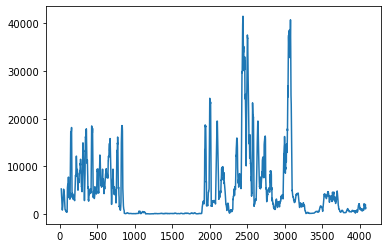

In [5]:
find_outliers(variable=' June 2020 Prices ', window=20, sigma=10)

Traceback (most recent call last):
 File "/home/muody/anaconda3/lib/python3.8/site-packages/pyviz_comms/__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/panel/viewable.py", line 259, in _on_msg
 doc.unhold()
 File "/home/muody/anaconda3/lib/python3.8/site-packages/bokeh/document/document.py", line 668, in unhold
 self._trigger_on_change(event)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/bokeh/document/document.py", line 1151, in _trigger_on_change
 self._with_self_as_curdoc(event.callback_invoker)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/bokeh/document/document.py", line 1169, in _with_self_as_curdoc
 return f()
 File "/home/muody/anaconda3/lib/python3.8/site-packages/bokeh/util/callback_manager.py", line 155, in invoke
 callback(attr, old, new)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/panel/reactive.py", line 216, in _comm_change
 self._process_events({attr: new})
 File "/home/muody/anaconda3/lib/python3.8/site-packages/panel/reactive.py", line 187, in _process_events
 self.param.set_param(**self._process_property_change(events))
 File "/home/muody/anaconda3/lib/python3.8/site-packages/param/parameterized.py", line 1472, in set_param
 self_._batch_call_watchers()
 File "/home/muody/anaconda3/lib/python3.8/site-packages/param/parameterized.py", line 1611, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/param/parameterized.py", line 1573, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/panel/interact.py", line 191, in update_pane
 new_object = self.object(**self.kwargs)
 File "<ipython-input-4-e01218453d3e>", line 15, in find_outliers
 avg = df[variable].rolling(window=window).mean()
 File "/home/muody/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py", line 10543, in rolling
 return Rolling(
 File "/home/muody/anaconda3/lib/python3.8/site-packages/pandas/core/window/rolling.py", line 169, in __init__
 self.validate()
 File "/home/muody/anaconda3/lib/python3.8/site-packages/pandas/core/window/rolling.py", line 1965, in validate
 raise ValueError("window must be non-negative")
ValueError: window must be non-negative
 


 Traceback (most recent call last):
 File "/home/muody/anaconda3/lib/python3.8/site-packages/pyviz_comms/__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/panel/viewable.py", line 259, in _on_msg
 doc.unhold()
 File "/home/muody/anaconda3/lib/python3.8/site-packages/bokeh/document/document.py", line 668, in unhold
 self._trigger_on_change(event)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/bokeh/document/document.py", line 1151, in _trigger_on_change
 self._with_self_as_curdoc(event.callback_invoker)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/bokeh/document/document.py", line 1169, in _with_self_as_curdoc
 return f()
 File "/home/muody/anaconda3/lib/python3.8/site-packages/bokeh/util/callback_manager.py", line 155, in invoke
 callback(attr, old, new)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/panel/reactive.py", line 216, in _comm_change
 self._process_events({attr: new})
 File "/home/muody/anaconda3/lib/python3.8/site-packages/panel/reactive.py", line 187, in _process_events
 self.param.set_param(**self._process_property_change(events))
 File "/home/muody/anaconda3/lib/python3.8/site-packages/param/parameterized.py", line 1472, in set_param
 self_._batch_call_watchers()
 File "/home/muody/anaconda3/lib/python3.8/site-packages/param/parameterized.py", line 1611, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/param/parameterized.py", line 1573, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/panel/interact.py", line 191, in update_

Column
    [0] Column
        [0] IntSlider(end=90, name='window', start=-30, value=30, value_throttled=30)
        [1] IntSlider(end=30, name='sigma', start=-10, value=10, value_throttled=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00007')
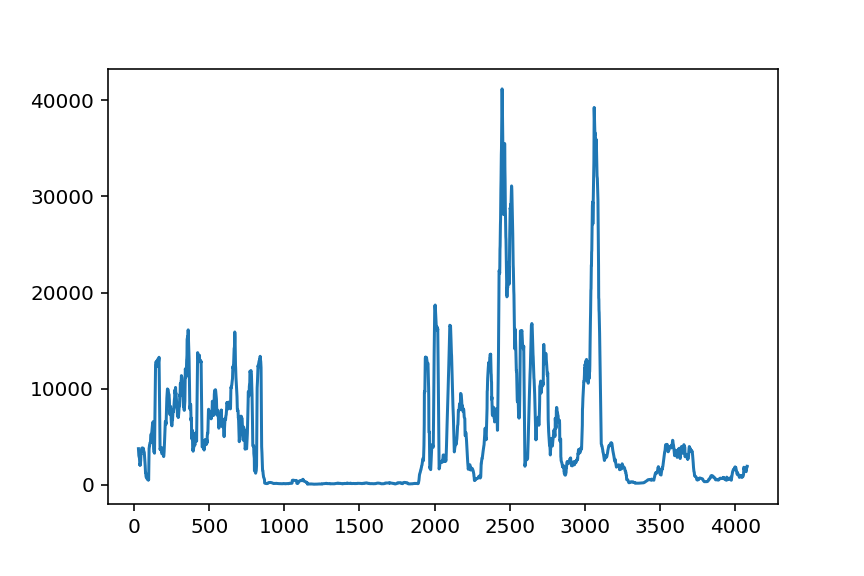

In [6]:
import panel as pn
pn.extension()

pn.interact(find_outliers)

Traceback (most recent call last):
 File "/home/muody/anaconda3/lib/python3.8/site-packages/pandas/core/window/rolling.py", line 355, in _prep_values
 values = ensure_float64(values)
 File "pandas/_libs/algos_common_helper.pxi", line 41, in pandas._libs.algos.ensure_float64
ValueError: could not convert string to float: 'RB INTENSIVE CARE'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
 File "/home/muody/anaconda3/lib/python3.8/site-packages/pandas/core/window/rolling.py", line 536, in _apply
 values = self._prep_values(b.values)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/pandas/core/window/rolling.py", line 357, in _prep_values
 raise TypeError(f"cannot handle this type -> {values.dtype}") from err
TypeError: cannot handle this type -> object

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
 File "/home/muody/anaconda3/lib/python3.8/site-packages/pyviz_comms/__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/panel/viewable.py", line 259, in _on_msg
 doc.unhold()
 File "/home/muody/anaconda3/lib/python3.8/site-packages/bokeh/document/document.py", line 668, in unhold
 self._trigger_on_change(event)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/bokeh/document/document.py", line 1151, in _trigger_on_change
 self._with_self_as_curdoc(event.callback_invoker)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/bokeh/document/document.py", line 1169, in _with_self_as_curdoc
 return f()
 File "/home/muody/anaconda3/lib/python3.8/site-packages/bokeh/util/callback_manager.py", line 155, in invoke
 callback(attr, old, new)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/panel/reactive.py", line 216, in _comm_change
 self._process_events({attr: new})
 File "/home/muody/anaconda3/lib/python3.8/site-packages/panel/reactive.py", line 187, in _process_events
 self.param.set_param(**self._process_property_change(events))
 File "/home/muody/anaconda3/lib/python3.8/site-packages/param/parameterized.py", line 1472, in set_param
 self_._batch_call_watchers()
 File "/home/muody/anaconda3/lib/python3.8/site-packages/param/parameterized.py", line 1611, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/param/parameterized.py", line 1573, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/panel/param.py", line 739, in _replace_pane
 new_object = self.eval(self.object)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/panel/param.py", line 663, in eval
 return function(*args, **kwargs)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/param/parameterized.py", line 351, in _depends
 return func(*args,**kw)
 File "<ipython-input-7-45ff9c7b48be>", line 9, in reactive_outliers
 return find_outliers(variable, window, 10)
 File "<ipython-input-4-e01218453d3e>", line 15, in find_outliers
 avg = df[variable].rolling(window=window).mean()
 File "/home/muody/anaconda3/lib/python3.8/site-packages/pandas/core/window/rolling.py", line 2091, in mean
 return super().mean(*args, **kwargs)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/pandas/core/window/rolling.py", line 1488, in mean
 return self._apply(window_func, center=self.center, name="mean", **kwargs)
 File "/home/muody/anaconda3/lib/python3.8/site-packages/pandas/core/window/rolling.py", line 544, in _apply
 raise DataError("No numeric types to aggregate") from err
pandas.core.base.DataError: No numeric types to aggregate
 


 Traceback (most recent call last):
 File "/home/muody/anaconda3/lib/python3.8/site-packages/pandas/core/window/rolling.py", line 355, in _prep_values
 values = ensure_float64(values)
 File "pandas/_libs/algos_common_helper.pxi", line 41, in pandas._libs.algos.ensure_float64
ValueError: could not convert string to float: 'G0

Row
    [0] ParamFunction(function)
    [1] Column
        [0] Markdown(str)
        [1] RadioButtonGroup(name='variable', options=['Charge Code', ...], value=' June 2020 Prices ')
        [2] IntSlider(end=60, name='window', start=1, value=10, value_throttled=10)
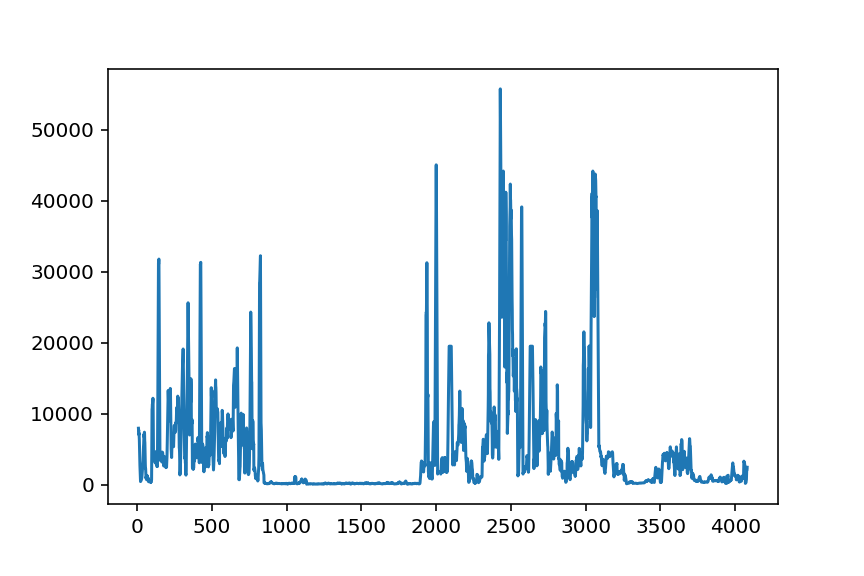

In [7]:
import panel.widgets as pnw

variable  = pnw.RadioButtonGroup(name='variable', value=' June 2020 Prices ', 
                                 options=list(df.columns))
window  = pnw.IntSlider(name='window', value=10, start=1, end=60)

@pn.depends(variable, window)
def reactive_outliers(variable, window):
    return find_outliers(variable, window, 10)

widgets   = pn.Column("<br>\n# Room occupancy", variable, window)
occupancy = pn.Row(reactive_outliers, widgets)
occupancy

In [8]:
bokeh_server = pn.serve(occupancy.servable())

#bokeh_server.stop()

Launching server at http://localhost:40241


In [12]:
widget = pn.widgets.TextInput(name='A widget', value='A string')
widget
print(widget.value)

from __future__ import print_function

widget.param.watch(print, 'value')

A string


Watcher(inst=TextInput(name='A widget', value='A string'), cls=<class 'panel.widgets.input.TextInput'>, fn=<built-in function print>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False)

In [14]:
bokeh_server = pn.serve(widget.servable())

Launching server at http://localhost:38677


In [22]:
def func():
    markdown = pn.pane.Markdown("Some text")
    text_input = pn.widgets.TextInput(value=markdown.object)

    text_input.link(markdown, value='object')
    
    return pn.Row(text_input, markdown)

In [26]:
bokeh_server = pn.serve(func)

Launching server at http://localhost:38707


In [27]:
bokeh_server.stop()

In [42]:

def func():
    autocomplete = pn.widgets.AutocompleteInput(
    name='Autocomplete Input', options=list(df['Charge Code Description'].dropna().str.lower().unique()),
    placeholder='Write something here')

    return autocomplete

In [43]:
bokeh_server = pn.serve(func)

Launching server at http://localhost:37569
